In [34]:
# made by Gibeom LEE, HI LAB
# 교류전압의 root mean square (RMS) 전압을 구하는 코드입니다.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumulative_trapezoid
import os
from scipy.signal import find_peaks

 
Detected peaks at:
Time: 1.46043 s, Voltage: -21.706 μA
Time: 2.08421 s, Voltage: -20.961 μA
Time: 2.71829 s, Voltage: -20.072 μA
Time: 3.34672 s, Voltage: -20.292 μA


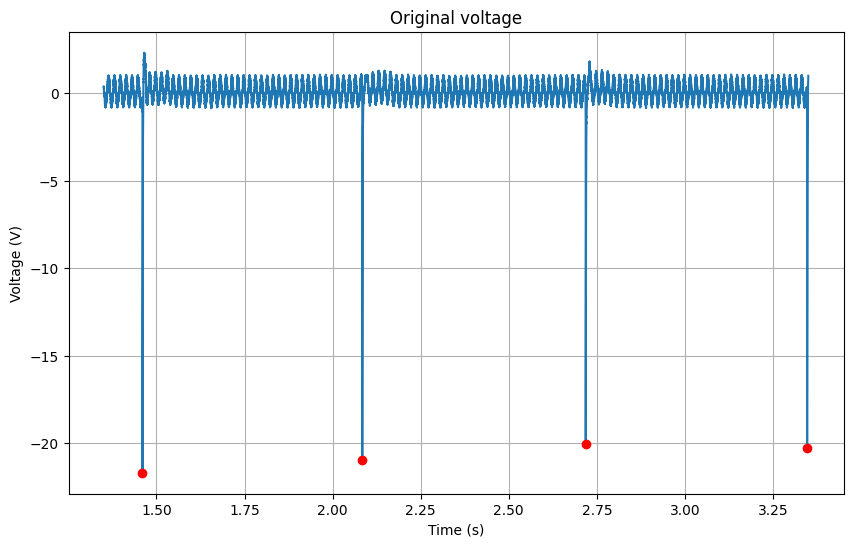

In [36]:
# 파일 경로
file_path = r"C:\Users\GCU\OneDrive - gachon.ac.kr\HI Lab\0. Projects\0. On going\2. Aloe inspired DEG\0. 실험자료\2. Collecting data\250424_포럼전 측정\Aloe DEG\A전압 픽4개\Cut_A2cm-v.csv"

# 데이터 로드 (헤더 없음)
df = pd.read_csv(file_path, header=None, skiprows=50)

# NaN 값 제거 및 컬럼 이름 지정
#df.iloc[:30, 1] = np.nan
df.columns = ["Time", "Voltage"]
df = df.astype(float)  # 데이터 타입 변환
voltage = df['Voltage']

peaks, properties = find_peaks(-df["Voltage"], height=8, distance=100, prominence=2)  # Find peak & print time

print(" ")
print("Detected peaks at:")
for idx in peaks:
    print(f"Time: {df['Time'].iloc[idx]:.5f} s, Voltage: {df['Voltage'].iloc[idx]:.3f} μA")
    
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], voltage, label='Original Voltage')
plt.plot(df["Time"].iloc[peaks], df["Voltage"].iloc[peaks], "ro", label='Detected Peaks')
plt.title('Original voltage')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid(True)
plt.show()


RMS Voltage (AC only): 0.8496 V


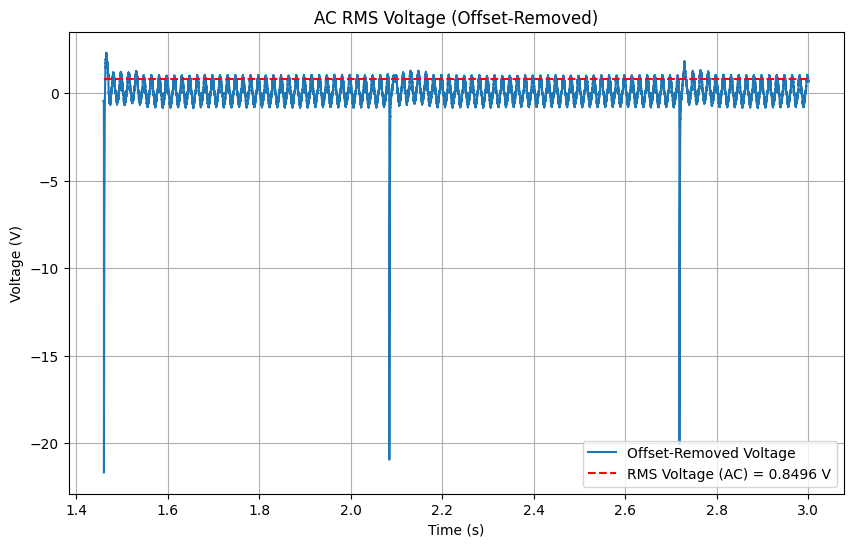

In [37]:
# (1) 데이터 필터링
time_range = (1.46, 3)
df = df[(df['Time'] >= time_range[0]) & (df['Time'] <= time_range[1])]
voltage = df['Voltage']

# (2) DC 오프셋 제거
voltage_ac = voltage #- np.mean(voltage)  # 중심이 0이 되도록 평탄화

# (3) RMS 계산 (AC 성분만)
rms_voltage_ac = np.sqrt(np.mean(np.square(voltage_ac)))
print(f"RMS Voltage (AC only): {rms_voltage_ac:.4f} V")

# (4) 그래프 출력
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], voltage_ac, label='Offset-Removed Voltage')
plt.hlines(rms_voltage_ac, xmin=df['Time'].min(), xmax=df['Time'].max(),
           colors='r', linestyles='dashed', label=f'RMS Voltage (AC) = {rms_voltage_ac:.4f} V')
plt.title('AC RMS Voltage (Offset-Removed)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()
